In [1]:
from pygbif import species # http://pygbif.readthedocs.org/en/latest/
from pygbif import occurrences
import copy

In [62]:
def load_species_occurrence(name_species): 
    if isinstance(name_species, basestring):
        name_species = [name_species]

    dfs_full = []
    
    for name in name_species:
        usageKey = species.name_backbone(name=name_species, verbose=False)['usageKey']
        first_res = occurrences.search(taxonKey=usageKey, limit=100000)
        full_results = copy.copy(first_res)

        # results are paginated so we need a loop to fetch them all
        counter = 1
        while first_res['endOfRecords'] is False:
            first_res = occurrences.search(taxonKey=usageKey, offset=300*counter, limit=10000)
            full_results['results'] = copy.copy(full_results['results']) + copy.copy(first_res['results'])
            counter+=1

        print(full_results['count'], len(full_results['results'])) # match?

        df_full = pd.DataFrame(full_results['results']) # load results in pandas dataframes
        dfs_full.append(df_full)
    return dfs_full

def plot_species_occurrence(dfs_full):
    if not isinstance(dfs_full, list):
        dfs_full = [dfs_full]
    colors = plt.cm.rainbow(np.linspace(0, 1, len(dfs_full)))
    # drop rows without latitude/longitude
    for df_full in dfs_full:
        df_clean = df_full.dropna(how='any',subset=['decimalLatitude', 'decimalLongitude'])
    
        # latitude/longitude lists

        df_full_latitude = df_clean.decimalLatitude
        df_full_longitude = df_clean.decimalLongitude

        # changed projection from 'ortho' to 'robin' to 'merc' finally
        # Make this plot larger.
        plt.figure(figsize=(16,12))

        plt.title("%s occurence records from GBIF" % df_clean['species'].dropna().tolist()[0] )

        my_map = Basemap(projection='merc', lat_0=50, lon_0=-100,
                  resolution='l', area_thresh=1000.0, 
                         llcrnrlon=df_full_longitude.min(),# lower left corner longitude point 
                         llcrnrlat=df_full_latitude.min(), # lower left corner latitude point
                         urcrnrlon=df_full_longitude.max(), # upper right longitude point
                         urcrnrlat=df_full_latitude.max() # upper right latitude point
                        )  


        # prepare longitude/latitude list for basemap
        df_x, df_y = my_map(df_full_longitude.tolist(), df_full_latitude.tolist())

        my_map.drawcoastlines()
        my_map.drawcountries()
        my_map.drawmapboundary(fill_color='#649eff')
        my_map.fillcontinents(color='#cc9955')
        # draw latitude and longitude
        my_map.drawmeridians(np.arange(0, 360, 30))
        my_map.drawparallels(np.arange(-90, 90, 30))
        my_map.plot(df_x, df_y, 'bo', markersize=5, color="#b01a1a")
    
    plt.show()

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap

In [16]:
import pandas as pd

In [17]:
import time

24 24
Elapsed time loading species in pandas: 0.7711710929870605 seconds


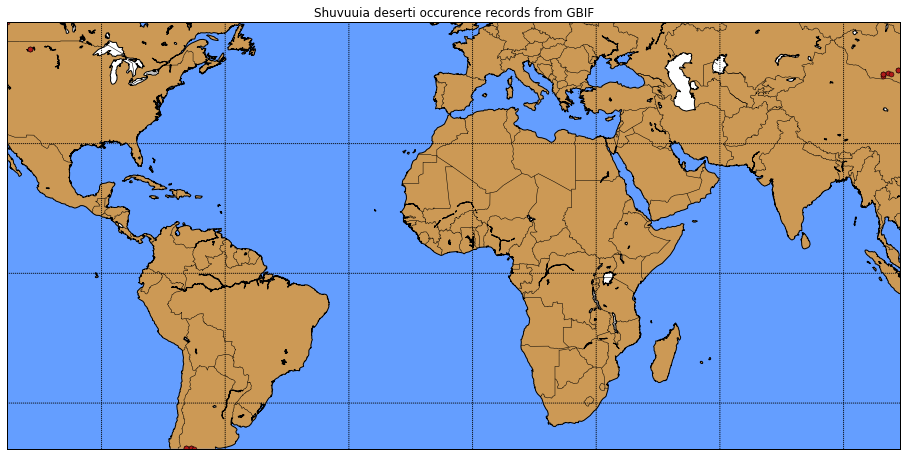

Elapsed time plotting species: 1.568812608718872 seconds


In [18]:
start = time.time()
df_species = load_species_occurrence("Alvarezsauridae Bonaparte") 
stop = time.time()
print("Elapsed time loading species in pandas: %s seconds" % (stop-start))
start = time.time()
plot_species_occurrence(df_species)
stop = time.time()
print("Elapsed time plotting species: %s seconds" % (stop-start))


In [19]:
df_species['species'].unique()

array(['Mononykus olecranus', nan, 'Shuvuuia deserti',
       'Ceratonykus oculatus', 'Albertonykus borealis',
       'Alvarezsaurus calvoi', 'Parvicursor remotus',
       'Patagonykus puertai', 'Achillesaurus manazzonei'], dtype=object)

41144 41144
Elapsed time loading species in pandas: 80.68101739883423 seconds


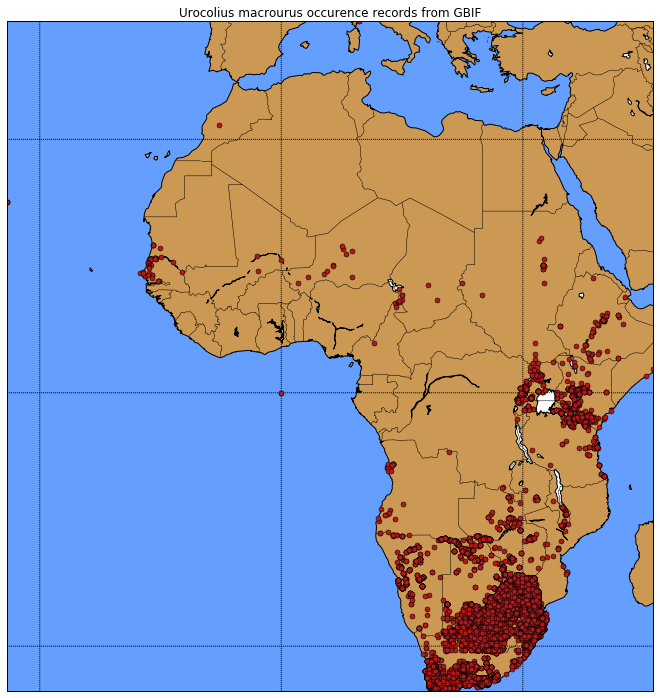

Elapsed time plotting species: 2.6647543907165527 seconds


In [20]:
start = time.time()
df_species = load_species_occurrence("Urocolius Bonaparte") 
stop = time.time()
print("Elapsed time loading species in pandas: %s seconds" % (stop-start))
start = time.time()
plot_species_occurrence(df_species)
stop = time.time()
print("Elapsed time plotting species: %s seconds" % (stop-start))

In [21]:
df_species['species'].unique()

array(['Urocolius macrourus', 'Urocolius indicus', nan], dtype=object)

125022 125022
Elapsed time loading species in pandas: 402.251097202301 seconds


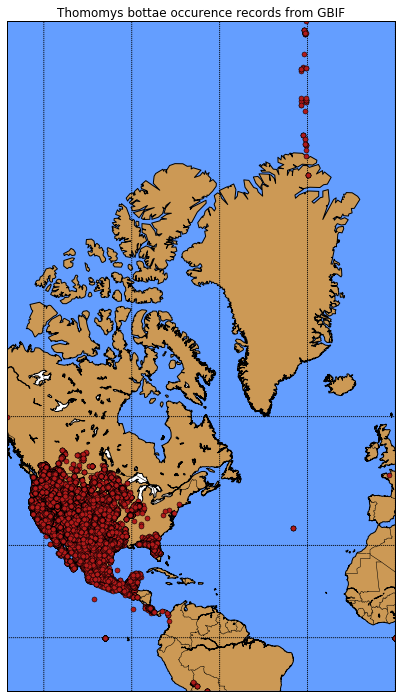

Elapsed time plotting species: 5.072403192520142 seconds


In [24]:
start = time.time()
df_species = load_species_occurrence("Geomyidae Bonaparte") 
stop = time.time()
print("Elapsed time loading species in pandas: %s seconds" % (stop-start))
start = time.time()
plot_species_occurrence(df_species)
stop = time.time()
print("Elapsed time plotting species: %s seconds" % (stop-start))

In [25]:
import xlrd # conda install xlrd

In [26]:
Ohio_dataset = "/home/daniela/Documents/NLeSC/Biodiversity/Aafke/2Daniela.xlsx"
book = xlrd.open_workbook(Ohio_dataset)
fish_selection = book.sheet_by_name('fish_selection')

fish_explore = []
for rownum in range(fish_selection.nrows):
    if fish_selection.row_values(rownum)[4]=='y':
        fish_explore.append(fish_selection.row_values(rownum)[0])
        

In [167]:
len(fish_explore)

66

In [181]:
# Let's generalize to list of species
def load_species_occurrences(name_species): 
    if isinstance(name_species, str):
        name_species = [name_species]

    dfs_full = []
    
    for name in name_species:
        usageKey = species.name_backbone(name=name, verbose=False)['usageKey']
        first_res = occurrences.search(taxonKey=usageKey, limit=100000)
        full_results = copy.copy(first_res)

        # results are paginated so we need a loop to fetch them all
        counter = 1
        while first_res['endOfRecords'] is False:
            first_res = occurrences.search(taxonKey=usageKey, offset=300*counter, limit=10000)
            full_results['results'] = copy.copy(full_results['results']) + copy.copy(first_res['results'])
            counter+=1

        print(full_results['count'], len(full_results['results'])) # match?

        df_full = pd.DataFrame(full_results['results']) # load results in pandas dataframes
        dfs_full.append(df_full)
    return dfs_full

def plot_species_occurrences(dfs_full):
    if not isinstance(dfs_full, list):
        dfs_full = [dfs_full]
    colors = plt.cm.rainbow(np.linspace(0, 1, len(dfs_full)))
    # drop rows without latitude/longitude
    #ajmo = pd.concat([one,two], ignore_index=True)    
    dfs_full_latitude = pd.concat([df_full.dropna(how='any',
                               subset=['decimalLatitude', 'decimalLongitude']).decimalLatitude 
                               for df_full in dfs_full], ignore_index=True)

    dfs_full_longitude = pd.concat([df_full.dropna(how='any',
                               subset=['decimalLatitude', 'decimalLongitude']).decimalLongitude 
                               for df_full in dfs_full], ignore_index=True)


    # changed projection from 'ortho' to 'robin' to 'merc' finally
    # Make this plot larger.    
    my_map = Basemap(projection='merc', lat_0=50, lon_0=-100,
                  resolution='l', area_thresh=1000.0, 
                         llcrnrlon=dfs_full_longitude.min(),# lower left corner longitude point 
                         llcrnrlat=dfs_full_latitude.min(), # lower left corner latitude point
                         urcrnrlon=dfs_full_longitude.max(), # upper right longitude point
                         urcrnrlat=dfs_full_latitude.max() # upper right latitude point
                        )  
    plt.figure(figsize=(20,20))

    plt.title("%s occurence records from GBIF" % "asdasf" ) 
    my_map.drawcoastlines()
    my_map.drawcountries()
    my_map.drawmapboundary(fill_color='#649eff')
    my_map.fillcontinents(color='#cc9955')
    # draw latitude and longitude
    my_map.drawmeridians(np.arange(0, 360, 30))
    my_map.drawparallels(np.arange(-90, 90, 30))
        
    for idx, df_full in enumerate(dfs_full):
        df_clean = df_full.dropna(how='any',subset=['decimalLatitude', 'decimalLongitude'])
        # latitude/longitude lists

        df_full_latitude = df_clean.decimalLatitude
        df_full_longitude = df_clean.decimalLongitude

        # prepare longitude/latitude list for basemap
        df_x, df_y = my_map(df_full_longitude.tolist(), df_full_latitude.tolist())

        my_map.plot(df_x, df_y, 'bo', markersize=5, color=colors[idx], 
                    label=df_clean['species'].dropna().tolist()[0])
    plt.legend()
    plt.show()

In [171]:
data_frames = load_species_occurrences(fish_explore[:3])

7225 7225
9785 9785
1389 1389


In [172]:
data_frames[2]['species'].unique()

array(['Rhinichthys obtusus'], dtype=object)

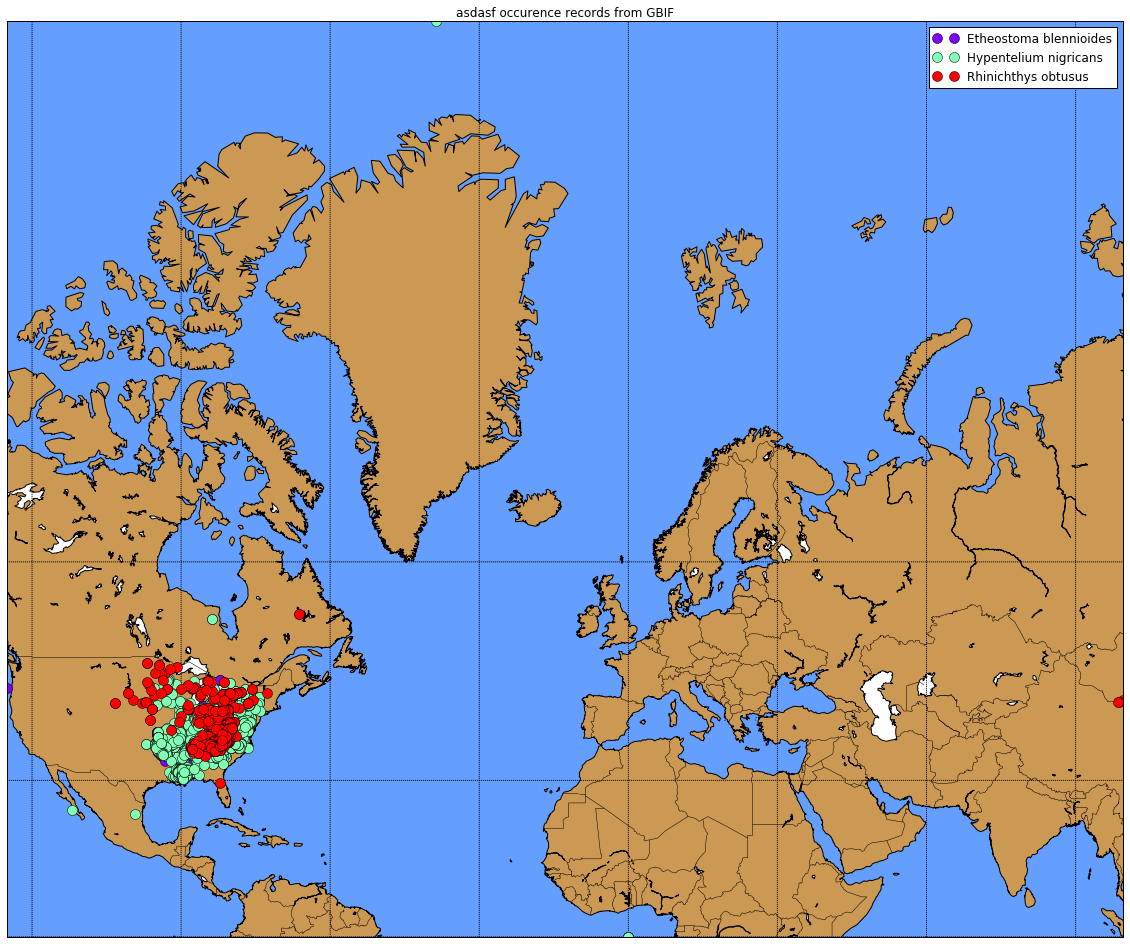

In [180]:
plot_species_occurrences(data_frames)